# UDATE PREPROCESSING ASSIGNMENT

In [2]:
#Standard modules
import pandas as pd
import numpy as np
import matplotlib as pltlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import random
from scipy import stats

In [3]:
import datetime                                                 # loading datetime module
from dateutil.relativedelta import relativedelta

In [4]:
#Reading Data
store=pd.read_csv('./data/store.csv')
test=pd.read_csv('./data/test.csv')
train=pd.read_csv('./data/train.csv',dtype={'StateHoliday': 'str'})

## 1. Data Preparation
#### 1.1 Data Information & Structure

In [5]:
store.head()                      ## It seems there are some NaN values

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [7]:
test.head()                      ## Sales and Customers are to be predicted

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [8]:
store.info()                      ## Not null, total 1115 entries, some seemed to have missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train.info()                      ## Not null, total 1017209 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
test.info()                      ## Not null, total 41088 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [11]:
#store
print("'Store' dataset contains:\n{} stores\n{} features".format(len(store),len(store.columns[1:])))
#train
print("\n'train' dataset contains:\n{} entries\n{} features".format(len(train),len(train.columns[1:])))
#test
print("\n'train' dataset contains:\n{} entries\n{} features".format(len(test),len(test.columns[1:])))
#train/test ratio
print("\nApprox. Ratio of test dataset versus train dataset: {} %".format(round((len(test)/len(train))*100)))

'Store' dataset contains:
1115 stores
9 features

'train' dataset contains:
1017209 entries
8 features

'train' dataset contains:
41088 entries
8 features

Approx. Ratio of test dataset versus train dataset: 4 %


In [12]:
data = pd.concat([train, test])

In [13]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263.0,555.0,1.0,1,0,1
1,2,5,31/07/2015,6064.0,625.0,1.0,1,0,1
2,3,5,31/07/2015,8314.0,821.0,1.0,1,0,1
3,4,5,31/07/2015,13995.0,1498.0,1.0,1,0,1
4,5,5,31/07/2015,4822.0,559.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


#### 1.2 Missing Value Handling & Data Cleaning

#### <b>'train' dataset</b>

In [14]:
data.isna().sum()                      ##No NA value included in this dataset 

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [15]:
#Check 0 values
#Empty list 
zero_c = []
zero_p = []

#Append the list of count and ratio
for col in data.columns:
    zero= data[data[col]==0].shape[0]
    zero_c.append(zero)
    zero_p.append(np.round(zero/data.shape[0]*100,2))

zero_table = pd.DataFrame([zero_c, zero_p], columns=data.columns, index=['Count', 'Percent(%)'])
zero_table

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Count,0.0,0.0,0.0,172871.00,172869.00,178801.0,653953.00,0.0,858354.00
Percent(%),0.0,0.0,0.0,16.33,16.33,16.9,61.79,0.0,81.11


: train dataset does not include NA values, there are some zero values. But they are categorical variables. 
As it can be observed, about 17% of sales and customers include zero values which means that there are no sales data. 
This can be disregarded from the data as we don't have the prediction. But to see if there are relationship between zero value with other variables, we will keep them for now. 
(If the open 17% (which means closed) are in a same row with zero values of sales and customers, we can totally ignore these data) 
The Open, Promo and SchoolHoliday are categorical, 17%, 61% and 82 % respectively including "No" as the repoonse. (between Yes or No)

In [16]:
check_zero=data[['Sales','Customers']][data['Open']==0].sum()
check_zero

Sales        0.0
Customers    0.0
dtype: float64

As checked above, these 17% of rows can be eliminated from the data.

In [17]:
#train data missing data treatment 
data2=data[data['Open']!=0]
data2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263.0,555.0,1.0,1,0,1
1,2,5,31/07/2015,6064.0,625.0,1.0,1,0,1
2,3,5,31/07/2015,8314.0,821.0,1.0,1,0,1
3,4,5,31/07/2015,13995.0,1498.0,1.0,1,0,1
4,5,5,31/07/2015,4822.0,559.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


'train2' dataset has been copied only with open==1 rows.

#### <b>'store' dataset</b>

In [18]:
store.isna().sum()                       ##As expected from 1.1, NA value included in in several features

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [19]:
print('Total Number of NA values in Store dataset: ', store.isna().sum().sum())

Total Number of NA values in Store dataset:  2343


In [20]:
store.describe()                       

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


How to deal with numeber of missing data will be handled on the following section as it includes many columns

In [21]:
#Check 0 values
#Empty list 
zero_c = []
zero_p = []

#Append the list of count and ratio
for col in store.columns:
    zero= store[store[col]==0].shape[0]
    zero_c.append(zero)
    zero_p.append(np.round(zero/store.shape[0]*100,2))

zero_table = pd.DataFrame([zero_c, zero_p], columns=store.columns, index=['Count', 'Percent(%)'])
zero_table

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Count,0.0,0.0,0.0,0.0,0.0,0.0,544.00,0.0,0.0,0.0
Percent(%),0.0,0.0,0.0,0.0,0.0,0.0,48.79,0.0,0.0,0.0


There are only 1 column includes zero value which is a categorical variable. No further action required. 

 <b>Before imputing data - check the distribution of each columns</b>

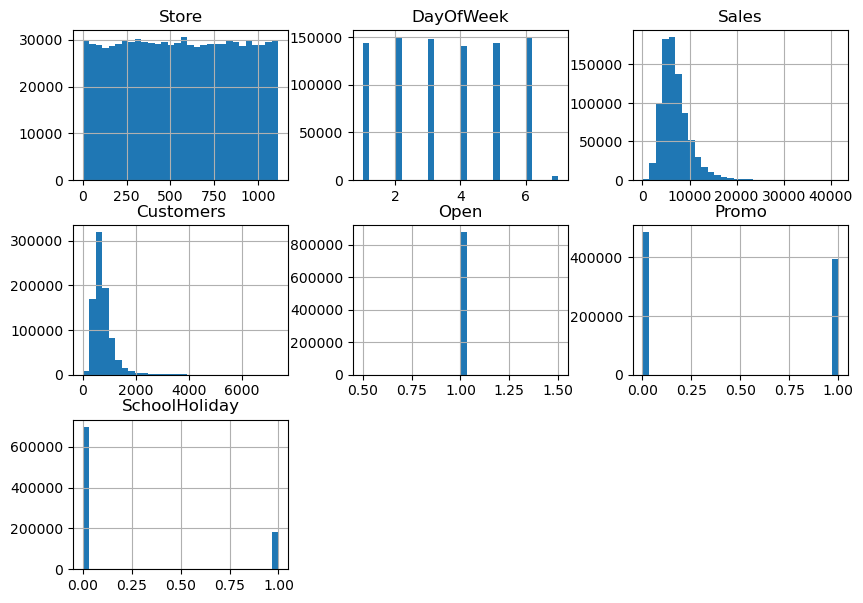

In [22]:
data2.hist(bins=30, figsize=(10,7))
plt.show()

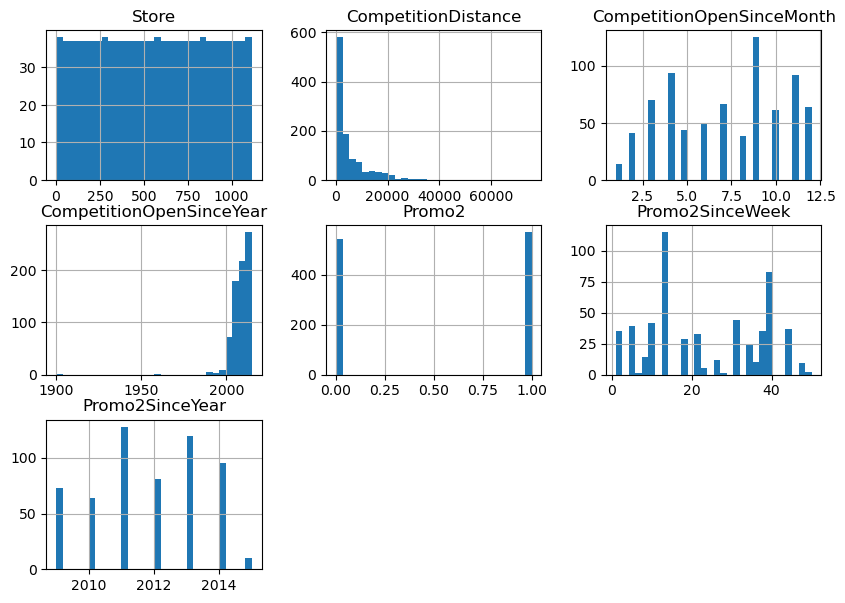

In [23]:
#There are missing values in CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Provo2SinceYear, PromoInterval
#Promo Interval including the month information -> this to be re-formed for the further analysis. 
store.hist(bins=30, figsize=(10,7))
plt.show()

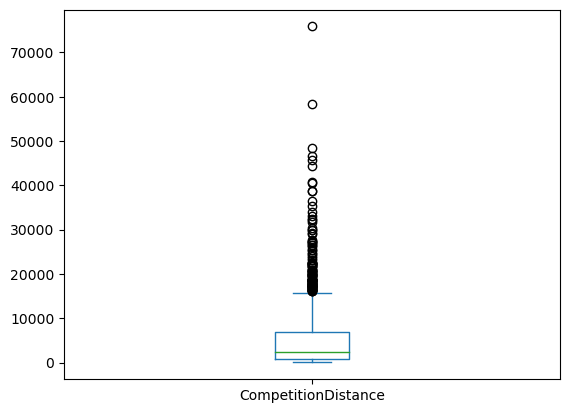

In [24]:
store['CompetitionDistance'].plot(kind='box');

In [25]:
#check if both data has same number of store
len(data2['Store'].unique())
len(store['Store'].unique())

1115

In [26]:
#convert CompetitionOpenDate
store['CompetitionOpenSinceMonth']= store['CompetitionOpenSinceMonth'].replace(np.nan, 0)
store['CompetitionOpenSinceYear']= store['CompetitionOpenSinceYear'].replace(np.nan, 0)
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].astype(int)
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].astype(int)

In [27]:
store['CompetitionOpenDate']=store['CompetitionOpenSinceYear'].astype(str).str.zfill(4)+store['CompetitionOpenSinceMonth'].astype(str).str.zfill(2)+'01'
store['CompetitionOpenDate']= store['CompetitionOpenDate'].replace('00000001', '19000101')
store['CompetitionOpenDate'] = pd.to_datetime(store['CompetitionOpenDate'], format='%Y%m%d')

As a result, the Competiotion related missing values are replaced to 19000101

In [28]:
#convert Promo2SinceDate
store['Promo2SinceWeek']= store['Promo2SinceWeek'].replace(np.nan, 0)
store['Promo2SinceYear']= store['Promo2SinceYear'].replace(np.nan, 0)
store['Promo2SinceYear']=store['Promo2SinceYear'].astype(int)
store['Promo2SinceWeek']=store['Promo2SinceWeek'].astype(int)

In [29]:
store['Promo2Date']=store['Promo2SinceYear'].astype(str).str.zfill(4)+store['Promo2SinceWeek'].astype(str).str.zfill(2)
store['Promo2Date']= store['Promo2Date'].replace('000000', '190001')

import datetime
def to_datetime(x):
  return datetime.datetime.strptime(x + '-1', "%Y%W-%w")

store['Promo2Date'] = store['Promo2Date'].apply(to_datetime)

As a result, the Promo2 related missing values are replaced to 190001

In [30]:
store2=store[['Store','StoreType','Assortment','CompetitionDistance','Promo2','CompetitionOpenDate','Promo2Date']]

In [31]:
store2

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,Promo2Date
0,1,c,a,1270.0,0,2008-09-01,1900-01-01
1,2,a,a,570.0,1,2007-11-01,2010-03-29
2,3,a,a,14130.0,1,2006-12-01,2011-04-04
3,4,c,c,620.0,0,2009-09-01,1900-01-01
4,5,a,a,29910.0,0,2015-04-01,1900-01-01
...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,2014-06-01,2013-08-05
1111,1112,c,c,1880.0,0,2006-04-01,1900-01-01
1112,1113,a,c,9260.0,0,1900-01-01,1900-01-01
1113,1114,a,c,870.0,0,1900-01-01,1900-01-01


In [32]:
store2[store2['CompetitionDistance']==0]

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,Promo2Date


In [33]:
store2['CompetitionDistance']=store2['CompetitionDistance'].fillna(0)

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/4276284216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store2['CompetitionDistance']=store2['CompetitionDistance'].fillna(0)


In [34]:
store2['CompetitionDistance']=store2['CompetitionDistance'].astype(int)
store2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Store                1115 non-null   int64         
 1   StoreType            1115 non-null   object        
 2   Assortment           1115 non-null   object        
 3   CompetitionDistance  1115 non-null   int64         
 4   Promo2               1115 non-null   int64         
 5   CompetitionOpenDate  1115 non-null   datetime64[ns]
 6   Promo2Date           1115 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 61.1+ KB


/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/805308315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store2['CompetitionDistance']=store2['CompetitionDistance'].astype(int)


In [35]:
store2[(store2.CompetitionDistance>=10000)]

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,Promo2Date
2,3,a,a,14130,1,2006-12-01,2011-04-04
4,5,a,a,29910,0,2015-04-01,1900-01-01
6,7,a,c,24000,0,2013-04-01,1900-01-01
17,18,d,c,13840,1,2010-06-01,2012-04-02
48,49,d,c,18010,0,2007-09-01,1900-01-01
...,...,...,...,...,...,...,...
1066,1067,d,c,12020,0,2009-07-01,1900-01-01
1068,1069,a,c,18050,1,1900-01-01,2011-04-04
1078,1079,a,a,16680,1,1900-01-01,2009-09-14
1082,1083,d,c,11540,1,1900-01-01,2013-02-04


In [36]:
store2[(store2.CompetitionDistance==0)&(store2.CompetitionOpenDate=='1900-01-01')]

,Store,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenDate,Promo2Date
290,291,d,a,0,0,1900-01-01,1900-01-01
621,622,a,c,0,0,1900-01-01,1900-01-01
878,879,d,a,0,1,1900-01-01,2013-02-04


In [37]:
store2['CompetitionDistance']=np.where((store2.CompetitionDistance>=10000)&(store2.CompetitionOpenDate=='1900-01-01'), 0, store2['CompetitionDistance'])

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/3451160903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store2['CompetitionDistance']=np.where((store2.CompetitionDistance>=10000)&(store2.CompetitionOpenDate=='1900-01-01'), 0, store2['CompetitionDistance'])


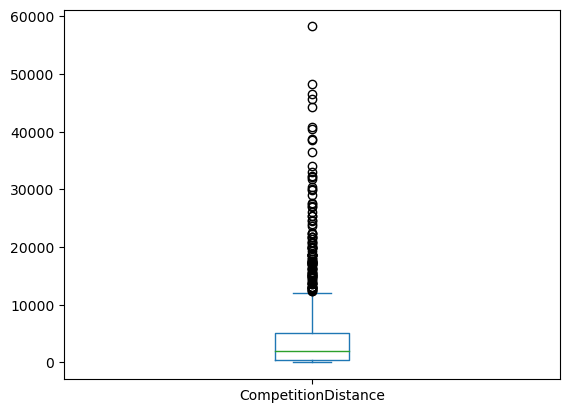

In [38]:
store2['CompetitionDistance'].plot(kind='box');

((array([-3.22884165, -2.96600564, -2.81948455, ...,  2.81948455,
          2.96600564,  3.22884165]),
  array([    0,     0,     0, ..., 46590, 48330, 58260])),
 (5396.192333102231, 4380.295964125561, 0.7955501280348676))

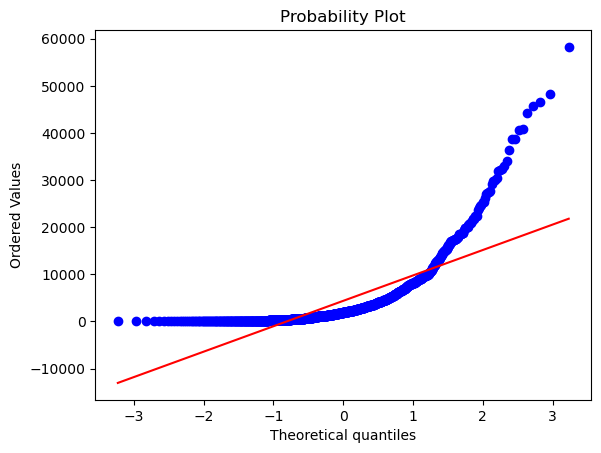

In [39]:
stats.probplot(store2['CompetitionDistance'],plot=plt)

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/1911727707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store2.CompetitionDistance, kde=True)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

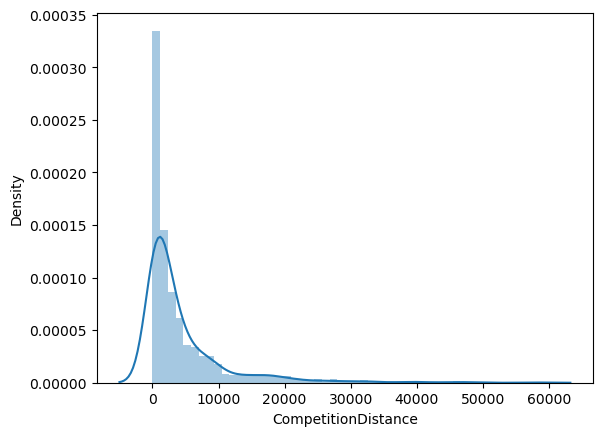

In [40]:
sns.distplot(store2.CompetitionDistance, kde=True)

In [41]:
store2['CompetitionDistance']=np.where((store2.CompetitionDistance>=10000), np.median(store2['CompetitionDistance']), store2['CompetitionDistance'])

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/4239965442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store2['CompetitionDistance']=np.where((store2.CompetitionDistance>=10000), np.median(store2['CompetitionDistance']), store2['CompetitionDistance'])


/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/1911727707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store2.CompetitionDistance, kde=True)


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Density'>

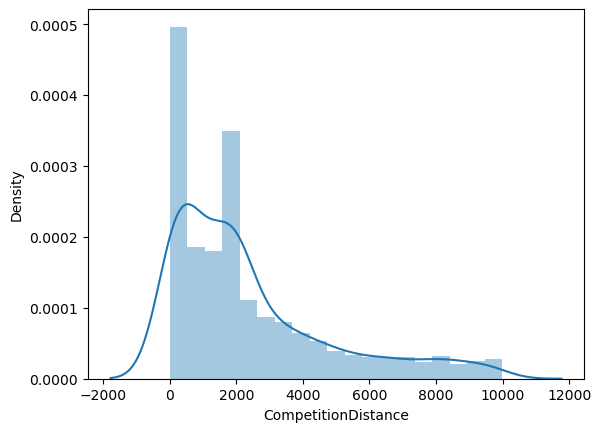

In [42]:
sns.distplot(store2.CompetitionDistance, kde=True)

In [43]:
#Merge data2 and store2 (Make sure all 'data2' included in this merged_data )
merged_data=pd.merge( data2, store2, how = 'left', on="Store")

<AxesSubplot:ylabel='Density'>

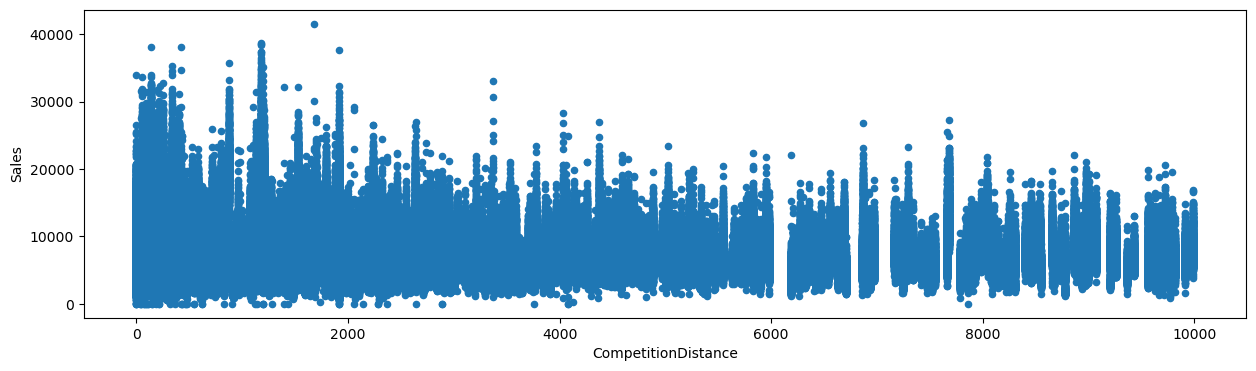

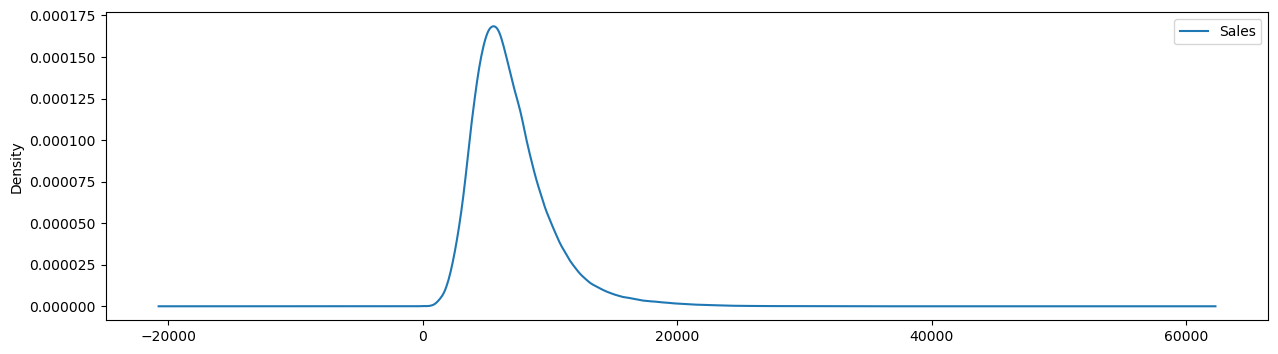

In [44]:
merged_data.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
merged_data.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                879496 non-null  int64         
 1   DayOfWeek            879496 non-null  int64         
 2   Date                 879496 non-null  object        
 3   Sales                844392 non-null  float64       
 4   Customers            844392 non-null  float64       
 5   Open                 879485 non-null  float64       
 6   Promo                879496 non-null  int64         
 7   StateHoliday         879496 non-null  object        
 8   SchoolHoliday        879496 non-null  int64         
 9   StoreType            879496 non-null  object        
 10  Assortment           879496 non-null  object        
 11  CompetitionDistance  879496 non-null  float64       
 12  Promo2               879496 non-null  int64         
 13  CompetitionOpe

In [46]:
#change date to yes or no (Competition and promo2 was on or not on the day) - dummy variablble
merged_data['Date']=pd.to_datetime(merged_data['Date'],infer_datetime_format=True, format='%Y-%m-%d')

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/3343594606.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_data['Date']=pd.to_datetime(merged_data['Date'],infer_datetime_format=True, format='%Y-%m-%d')


<AxesSubplot:xlabel='Date'>

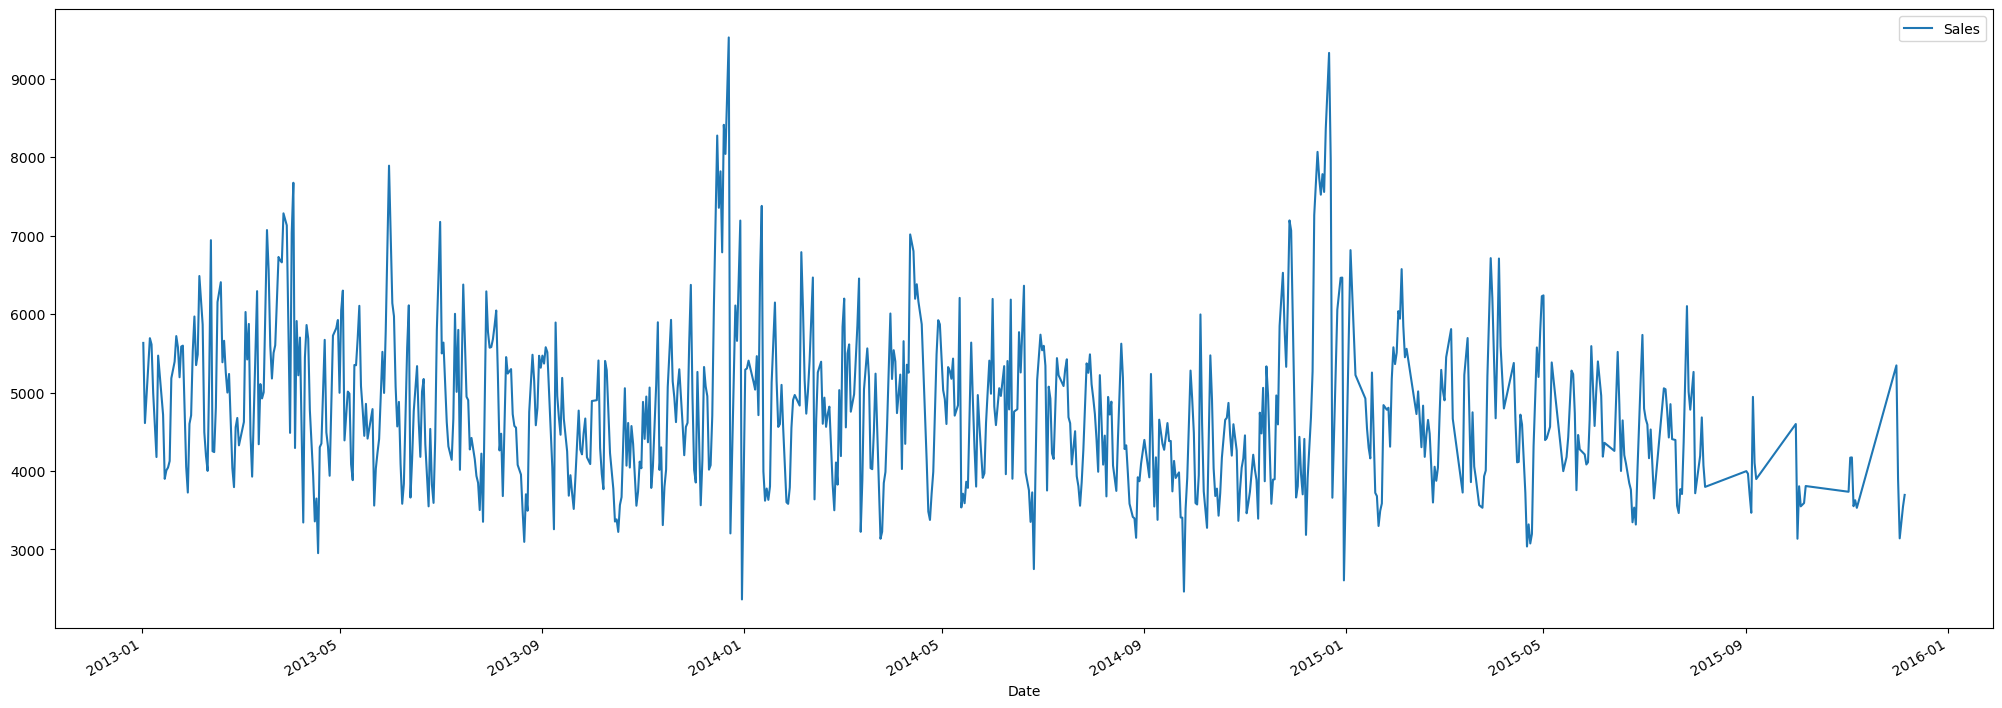

In [47]:
f = plt.figure(figsize=(25,20))
ax1 = f.add_subplot(211)

store_1 = merged_data.loc[(merged_data["Store"]==1)&(merged_data['Sales']>0), ['Date',"Sales"]]
store_1.plot(kind='line',x='Date', y='Sales', ax=ax1)

In [48]:
#Add additional columns of Competition and Promo2
merged_data['CompetitionYN']=np.where(merged_data['CompetitionOpenDate']>=merged_data['Date'], 0, 1)
merged_data['Promo2YN']=np.where(merged_data['Promo2Date']>=merged_data['Date'], 0, 1)

In [49]:
merged_data2=merged_data[['Sales','Date','Store', 'Assortment','StoreType','CompetitionDistance','DayOfWeek', 'Customers','Promo', "StateHoliday", "SchoolHoliday", "CompetitionYN", "Promo2YN" ]]

In [50]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Sales                844392 non-null  float64       
 1   Date                 879496 non-null  datetime64[ns]
 2   Store                879496 non-null  int64         
 3   Assortment           879496 non-null  object        
 4   StoreType            879496 non-null  object        
 5   CompetitionDistance  879496 non-null  float64       
 6   DayOfWeek            879496 non-null  int64         
 7   Customers            844392 non-null  float64       
 8   Promo                879496 non-null  int64         
 9   StateHoliday         879496 non-null  object        
 10  SchoolHoliday        879496 non-null  int64         
 11  CompetitionYN        879496 non-null  int64         
 12  Promo2YN             879496 non-null  int64         
dtypes: datetime64[

In [51]:
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(merged_data2.shape[0]),str(merged_data2.shape[1]))) 

The Train_Store dataset has 879496 Rows and 13 Variables


In [52]:
merged_data2['CompetitionDist_Cat']=pd.cut(merged_data2['CompetitionDistance'], 5)
merged_data2.groupby(by="CompetitionDist_Cat").Sales.mean(),merged_data2.groupby(by="CompetitionDist_Cat").Customers.mean()

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/786079531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['CompetitionDist_Cat']=pd.cut(merged_data2['CompetitionDistance'], 5)


(CompetitionDist_Cat
 (-9.99, 1998.0]     7108.280082
 (1998.0, 3996.0]    6527.024062
 (3996.0, 5994.0]    6967.360192
 (5994.0, 7992.0]    6680.553348
 (7992.0, 9990.0]    6878.979496
 Name: Sales, dtype: float64,
 CompetitionDist_Cat
 (-9.99, 1998.0]     820.387411
 (1998.0, 3996.0]    681.707083
 (3996.0, 5994.0]    684.891023
 (5994.0, 7992.0]    630.637391
 (7992.0, 9990.0]    629.002032
 Name: Customers, dtype: float64)

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/852060796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['Month']=merged_data2.Date.dt.month
/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/852060796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data2['Year']=merged_data2.Date.dt.year


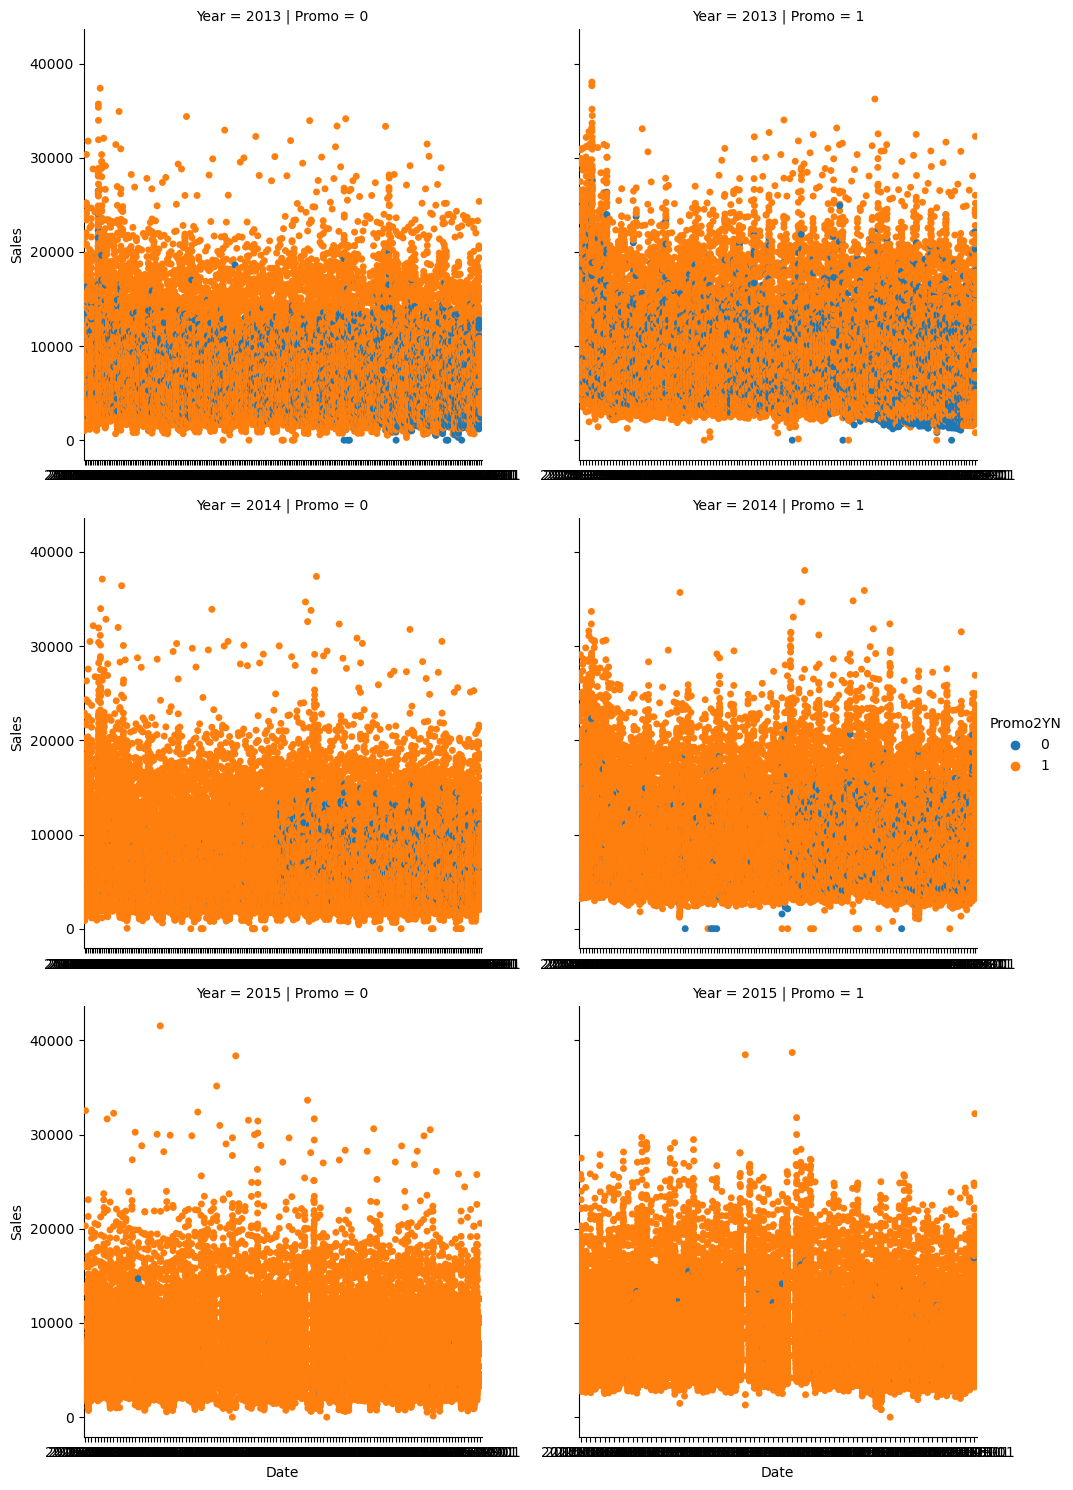

In [53]:
merged_data2['Month']=merged_data2.Date.dt.month
merged_data2['Year']=merged_data2.Date.dt.year

sns.catplot(data = merged_data2, x ="Date", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2YN',
               row = "Year"
              ,sharex=False)

In [54]:
merged_data2

,Sales,Date,Store,Assortment,StoreType,CompetitionDistance,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionYN,Promo2YN,CompetitionDist_Cat,Month,Year
0,5263.0,2015-07-31,1,a,c,1270.0,5,555.0,1,0,1,1,1,"(-9.99, 1998.0]",7,2015
1,6064.0,2015-07-31,2,a,a,570.0,5,625.0,1,0,1,1,1,"(-9.99, 1998.0]",7,2015
2,8314.0,2015-07-31,3,a,a,1910.0,5,821.0,1,0,1,1,1,"(-9.99, 1998.0]",7,2015
3,13995.0,2015-07-31,4,c,c,620.0,5,1498.0,1,0,1,1,1,"(-9.99, 1998.0]",7,2015
4,4822.0,2015-07-31,5,a,a,1910.0,5,559.0,1,0,1,1,1,"(-9.99, 1998.0]",7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879491,NaN,2015-01-08,1111,a,a,1900.0,6,NaN,0,0,0,1,1,"(-9.99, 1998.0]",1,2015
879492,NaN,2015-01-08,1112,c,c,1880.0,6,NaN,0,0,0,1,1,"(-9.99, 1998.0]",1,2015
879493,NaN,2015-01-08,1113,c,a,9260.0,6,NaN,0,0,0,1,1,"(7992.0, 9990.0]",1,2015
879494,NaN,2015-01-08,1114,c,a,870.0,6,NaN,0,0,0,1,1,"(-9.99, 1998.0]",1,2015


In [55]:
## Divide the columns by type - category & numerical
categorical_columns_subset = [
    'Assortment','StoreType','DayOfWeek', 'Promo', "StateHoliday", 
    "SchoolHoliday", "CompetitionYN", "Promo2YN","CompetitionDist_Cat",'Store',
]

numerical_columns_subset = [
    'CompetitionDistance',
    'Sales',
    'Customers'
]

merged_data3 = merged_data2[categorical_columns_subset + numerical_columns_subset]
merged_data3[categorical_columns_subset] = merged_data2[categorical_columns_subset].astype("category")

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/1910774588.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data3[categorical_columns_subset] = merged_data2[categorical_columns_subset].astype("category")


In [56]:
merged_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879496 entries, 0 to 879495
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Assortment           879496 non-null  category
 1   StoreType            879496 non-null  category
 2   DayOfWeek            879496 non-null  category
 3   Promo                879496 non-null  category
 4   StateHoliday         879496 non-null  category
 5   SchoolHoliday        879496 non-null  category
 6   CompetitionYN        879496 non-null  category
 7   Promo2YN             879496 non-null  category
 8   CompetitionDist_Cat  879496 non-null  category
 9   Store                879496 non-null  category
 10  CompetitionDistance  879496 non-null  float64 
 11  Sales                844392 non-null  float64 
 12  Customers            844392 non-null  float64 
dtypes: category(10), float64(3)
memory usage: 68.4 MB


In [57]:
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(merged_data3.shape[0]),str(merged_data3.shape[1]))) 

The Train_Store dataset has 879496 Rows and 13 Variables


In [58]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude="category")
categorical_columns_selector = selector(dtype_include="category")

numerical_columns = numerical_columns_selector(merged_data3)
categorical_columns = categorical_columns_selector(merged_data3)

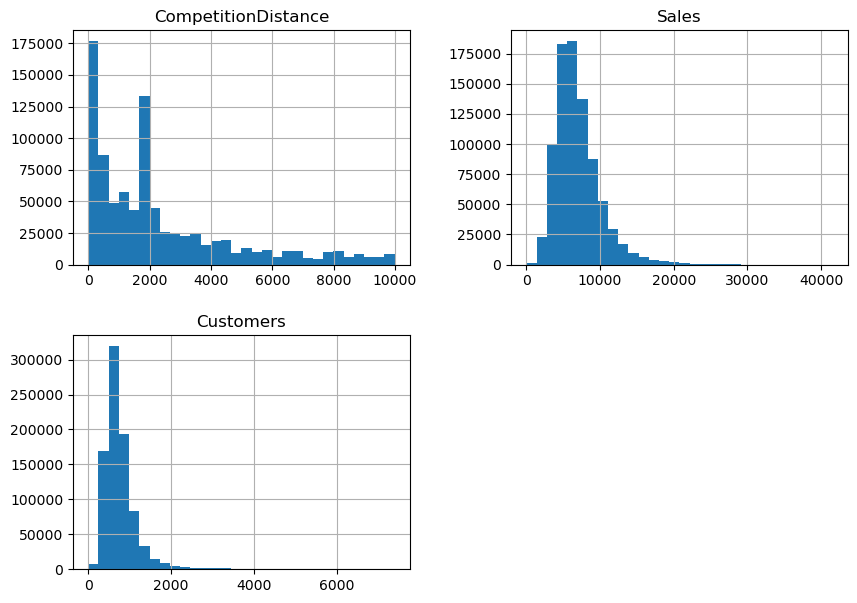

In [59]:
#Check the distribution of the column which needs to be used for model fitting 
merged_data3.hist(bins=30, figsize=(10,7))
plt.show()

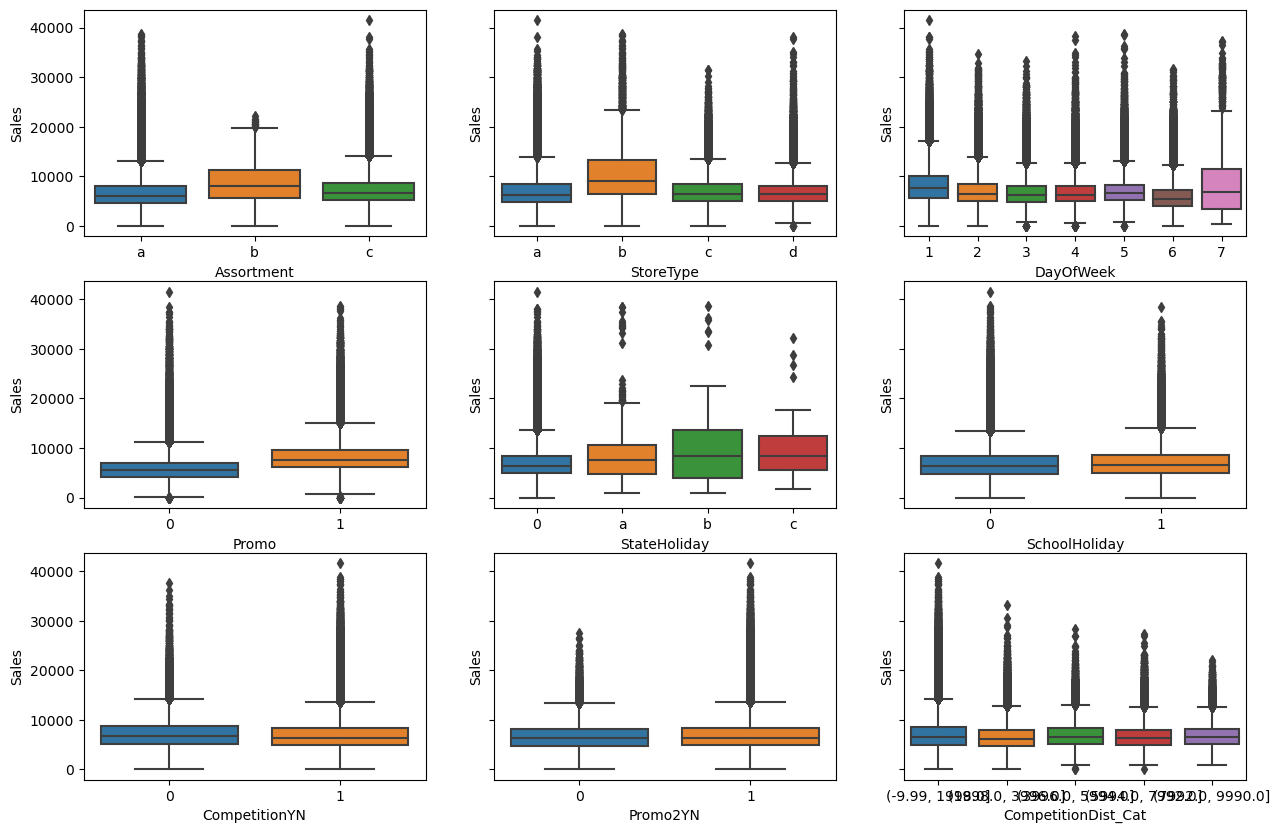

In [60]:
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False, sharey=True)
i = [0,0,0,1,1,1,2,2,2]
j=[0,1,2,0,1,2,0,1,2]
column=categorical_columns

for c, i, j in zip(column, i, j):
    ax=sns.boxplot(x=merged_data3[c],y=merged_data3.Sales,ax = axes[i, j])

plt.show()

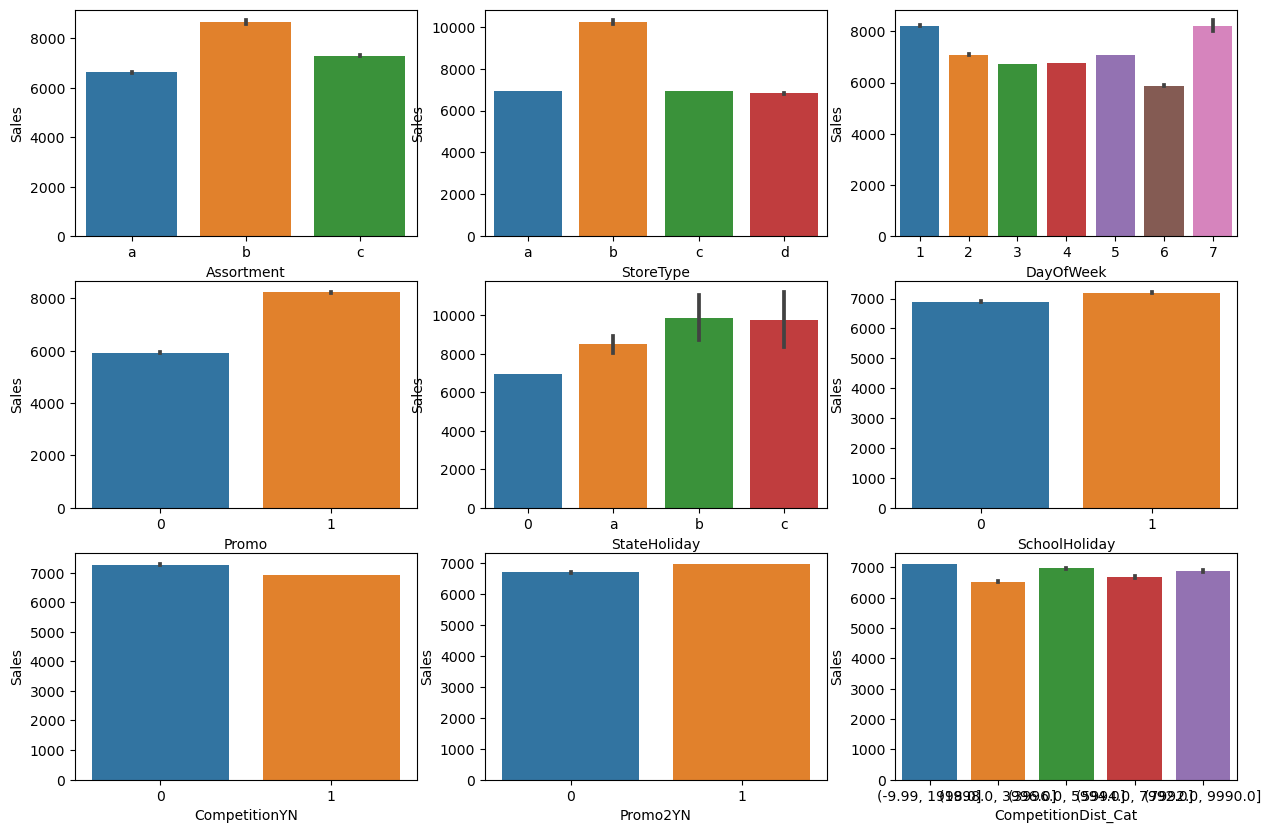

In [61]:
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=False)
i = [0,0,0,1,1,1,2,2,2]
j=[0,1,2,0,1,2,0,1,2]
column=categorical_columns

for c, i, j in zip(column, i, j):
    ax=sns.barplot(x=merged_data3[c],y=merged_data3.Sales, ax = axes[i, j])

plt.show()

In [62]:
merged_data4=merged_data3.copy(deep=True)
merged_data4['StateHoliday'] = merged_data3['StateHoliday'].astype('category')
merged_data4['Assortment'] = merged_data3['Assortment'].astype('category')
merged_data4['StoreType'] = merged_data3['StoreType'].astype('category')

In [63]:
merged_data4['StateHoliday_cat'] = merged_data3['StateHoliday'].cat.codes
merged_data4['Assortment_cat'] = merged_data3['Assortment'].cat.codes
merged_data4['StoreType_cat'] = merged_data3['StoreType'].cat.codes

In [64]:
merged_data4['StateHoliday_cat'] = merged_data4['StateHoliday_cat'].astype('float')
merged_data4['Assortment_cat'] = merged_data4['Assortment_cat'].astype('float')
merged_data4['StoreType_cat'] = merged_data4['StoreType_cat'].astype('float')

In [65]:
merged_data4['SalesperCustomer'] = merged_data4['Sales'] / merged_data4['Customers']

In [66]:
df_correlation=merged_data4[[
        'Store', 'DayOfWeek', 'Sales', 
        'Customers', 'Promo',
        'SchoolHoliday',
        'CompetitionDistance', 'Promo2YN','CompetitionYN', 
        'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat','SalesperCustomer']]

In [67]:
df_correlation.corr(numeric_only=False)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2YN,CompetitionYN,StateHoliday_cat,Assortment_cat,StoreType_cat,SalesperCustomer
Store,1.000000,0.000393,0.007710,0.033977,-0.000063,-0.000439,-0.031677,-0.013453,0.011954,0.001895,0.005221,-0.022600,-0.048423
DayOfWeek,0.000393,1.000000,-0.178736,-0.097266,-0.290138,-0.143865,-0.004375,0.000720,0.001037,-0.001686,0.001360,-0.002125,-0.094924
Sales,0.007710,-0.178736,1.000000,0.823597,0.368145,0.038617,-0.049206,0.021897,-0.030162,0.020107,0.109030,-0.016161,0.186581
Customers,0.033977,-0.097266,0.823597,1.000000,0.182846,0.024902,-0.197402,0.034522,-0.016831,0.049521,0.007272,-0.194623,-0.323898
Promo,-0.000063,-0.290138,0.368145,0.182846,1.000000,0.035300,0.001962,0.000138,-0.004705,-0.002958,-0.000363,0.000460,0.280009
SchoolHoliday,-0.000439,-0.143865,0.038617,0.024902,0.035300,1.000000,0.002057,0.012941,0.005692,0.020569,-0.001221,0.004220,0.013192
CompetitionDistance,-0.031677,-0.004375,-0.049206,-0.197402,0.001962,0.002057,1.000000,0.025315,0.010462,-0.010113,0.154492,0.230264,0.314988
Promo2YN,-0.013453,0.000720,0.021897,0.034522,0.000138,0.012941,0.025315,1.000000,0.095711,0.002949,0.056613,0.035469,-0.017734
CompetitionYN,0.011954,0.001037,-0.030162,-0.016831,-0.004705,0.005692,0.010462,0.095711,1.000000,0.001300,0.032592,-0.008110,-0.004422
StateHoliday_cat,0.001895,-0.001686,0.020107,0.049521,-0.002958,0.020569,-0.010113,0.002949,0.001300,1.000000,-0.000773,-0.004213,-0.033580


/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/1808419917.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = np.zeros_like(df_correlation.corr(numeric_only=False), dtype = np.bool)


<AxesSubplot:>

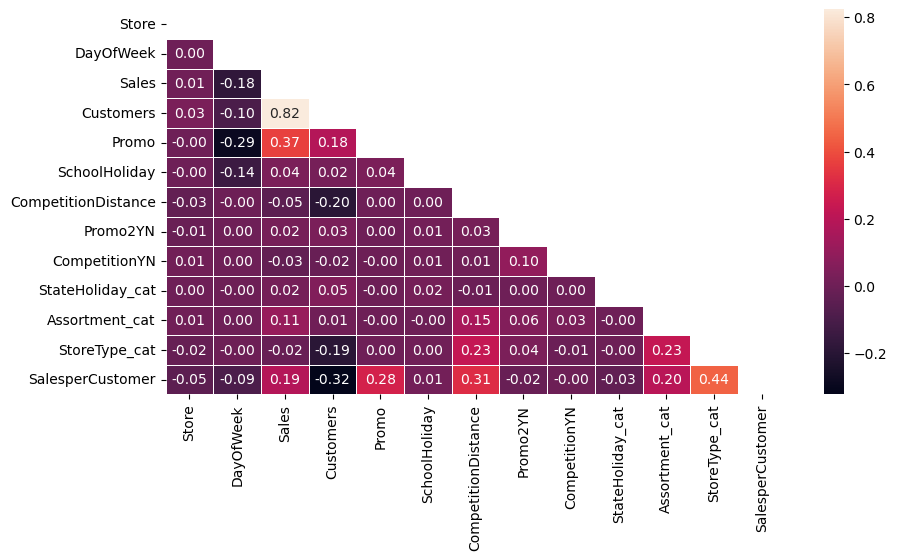

In [68]:
upper_triangle = np.zeros_like(df_correlation.corr(numeric_only=False), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle

f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(df_correlation.corr(numeric_only=False),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5)

In [69]:
merged_data4

,Assortment,StoreType,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionYN,Promo2YN,CompetitionDist_Cat,Store,CompetitionDistance,Sales,Customers,StateHoliday_cat,Assortment_cat,StoreType_cat,SalesperCustomer
0,a,c,5,1,0,1,1,1,"(-9.99, 1998.0]",1,1270.0,5263.0,555.0,0.0,0.0,2.0,9.482883
1,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",2,570.0,6064.0,625.0,0.0,0.0,0.0,9.702400
2,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",3,1910.0,8314.0,821.0,0.0,0.0,0.0,10.126675
3,c,c,5,1,0,1,1,1,"(-9.99, 1998.0]",4,620.0,13995.0,1498.0,0.0,2.0,2.0,9.342457
4,a,a,5,1,0,1,1,1,"(-9.99, 1998.0]",5,1910.0,4822.0,559.0,0.0,0.0,0.0,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879491,a,a,6,0,0,0,1,1,"(-9.99, 1998.0]",1111,1900.0,NaN,NaN,0.0,0.0,0.0,NaN
879492,c,c,6,0,0,0,1,1,"(-9.99, 1998.0]",1112,1880.0,NaN,NaN,0.0,2.0,2.0,NaN
879493,c,a,6,0,0,0,1,1,"(7992.0, 9990.0]",1113,9260.0,NaN,NaN,0.0,2.0,0.0,NaN
879494,c,a,6,0,0,0,1,1,"(-9.99, 1998.0]",1114,870.0,NaN,NaN,0.0,2.0,0.0,NaN


In [70]:
#Train and Test data set split
traindata=merged_data4[merged_data4['Sales'].notna()]
testdata=merged_data4[merged_data4['Sales'].isna()]

traindata.reset_index()
testdata.reset_index()

y_train=traindata.iloc[:,[11,12,16]]
X_train=traindata.drop(['Sales','Customers','SalesperCustomer'], axis=1)

y_test=testdata.iloc[:,[11,12,16]]
X_test=testdata.drop(['Sales','Customers','SalesperCustomer'], axis=1)

In [71]:
y_train['SalesperCustomer']=y_train['SalesperCustomer'].replace(np.nan, 0)

/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_2471/2219337942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['SalesperCustomer']=y_train['SalesperCustomer'].replace(np.nan, 0)


In [72]:
#Scaling for categorical and numerical
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [73]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor,[numerical_columns[0]])],remainder='passthrough')

In [74]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Assortment', 'StoreType',
                                                   'DayOfWeek', 'Promo',
                                                   'StateHoliday',
                                                   'SchoolHoliday',
                                                   'CompetitionYN', 'Promo2YN',
                                                   'CompetitionDist_Cat',
                                                   'Store']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['CompetitionDistance'])])),
                ('linearr

In [75]:
_ = model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8408775943419938

In [76]:
predictions = model.predict(X_test)
predictions

array([[5.55484153e+03, 6.18449295e+02, 8.83248427e+00],
       [7.73653091e+03, 8.04328434e+02, 9.55639020e+00],
       [9.57601502e+03, 9.98463366e+02, 9.67723289e+00],
       ...,
       [5.54960108e+03, 6.17932331e+02, 8.95662509e+00],
       [1.95849458e+04, 3.10169926e+03, 6.19811425e+00],
       [5.42603022e+03, 3.42616189e+02, 1.42999434e+01]])

In [77]:
y_test_pred = pd.DataFrame(predictions, columns = ['Sales','Customers','SalesperCustomer'])
y_test_pred

,Sales,Customers,SalesperCustomer
0,5554.841528,618.449295,8.832484
1,7736.530908,804.328434,9.556390
2,9576.015023,998.463366,9.677233
3,6064.053373,679.870867,8.759680
4,7356.299482,634.067851,11.645204
...,...,...,...
35099,4013.231343,324.585169,11.422947
35100,9155.703134,739.398562,11.737646
35101,5549.601078,617.932331,8.956625
35102,19584.945845,3101.699260,6.198114


In [78]:
np.mean(y_test_pred)

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Sales               6948.046372
Customers            740.607324
SalesperCustomer       9.815689
dtype: float64

In [79]:
np.mean(y_train)

Sales               6955.514291
Customers            762.728395
SalesperCustomer       9.493034
dtype: float64

In [100]:
def rmspe(y_true, y_pred):
    #small_constant = 1e-6
    #y_true = np.maximum(y_true, small_constant)
    rmspe_result = np.sqrt(np.sum(np.isfinite(np.square(((y_true - y_pred)/ y_true))))/len(y_true))
    return rmspe_result

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

rmspe_scorer = make_scorer(rmspe)
cv_results= cross_validate(model, X_train, y_train['Sales'], scoring = rmspe_scorer, cv=5)
cv_results

{'fit_time': array([4.73842406, 4.76956105, 4.71571517, 4.66047096, 4.75804114]),
 'score_time': array([0.41294599, 0.50632405, 0.41064692, 0.49342799, 0.42868304]),
 'test_score': array([0.99999112, 0.99995263, 0.99995263, 0.9999852 , 0.99995855])}

In [82]:
scores = cv_results["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 1.000 ± 0.000


In [1]:
from xgboost import XGBRegressor

In [84]:
xgb = XGBRegressor( n_estimators= 300 , learning_rate=0.1 , random_state=2020 )

model_xgb = make_pipeline(preprocessor, xgb)

model_xgb.fit(X_train, y_train)
model_xgb.score(X_train, y_train)

0.719683176806437

In [98]:
from sklearn.model_selection import cross_validate

cv_results_xgb= cross_validate(model_xgb, X_train, y_train['Sales'], scoring = rmspe_scorer, cv=5)
cv_results_xgb

{'fit_time': array([56.69844222, 58.37908673, 57.12841606, 58.03437805, 56.68053913]),
 'score_time': array([1.05496573, 0.81975913, 0.79759192, 0.9032321 , 1.00925088]),
 'test_score': array([0.99999112, 0.99995263, 0.99995263, 0.9999852 , 0.99995855])}

In [99]:
scores = cv_results_xgb["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 1.000 ± 0.000


In [85]:
xgb.feature_importances_

array([4.1062874e-03, 3.6993959e-09, 4.4751689e-03, ..., 6.5315413e-05,
       0.0000000e+00, 1.1069113e-03], dtype=float32)

In [90]:
len(xgb.feature_importances_)

1150

In [94]:
X_train_prep=preprocessor.fit(X_train)

In [97]:
input_var = ['Assortment', 'StoreType', 'DayOfWeek',
                                  'Promo', 'StateHoliday', 'SchoolHoliday',
                                  'CompetitionYN', 'Promo2YN',
                                  'CompetitionDist_Cat', 'Store','CompetitionDistance']
imp_df = pd.DataFrame({"var": input_var,
                       "imp": xgb.feature_importances_})
imp_df = imp_df.sort_values(['imp'],ascending=False)
imp_df

ValueError: All arrays must be of the same length

In [ ]:
plt.bar(imp_df['var'],imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
score_list=[]
selected_varnum=[]

In [ ]:
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

In [ ]:
plt.plot(selected_varnum, score_list)

In [138]:
#MLP regression 
from sklearn.neural_network import MLPRegressor

mlp=MLPRegressor(hidden_layer_sizes=10, random_state=42)
model_mlp = make_pipeline(preprocessor, mlp)

model_mlp.fit(X_train, y_train)
model_mlp.score(X_train, y_train)

y_pred_mlp = model_mlp.predict(X_test)

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7804333187994521

In [139]:
y_pred_mlp = model_mlp.predict(X_test)

In [140]:
from sklearn.model_selection import cross_validate

cv_results_mlp= cross_validate(model_mlp, X_train, y_train['Sales'], scoring = rmspe_scorer, cv=5)
cv_results_mlp

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'fit_time': array([1100.97662902, 1058.73267198, 1236.90754461, 1212.85842133,
         468.25576425]),
 'score_time': array([0.80900288, 0.85142994, 0.69156098, 0.74231482, 0.83228397]),
 'test_score': array([0.99999112, 0.99995263, 0.99995263, 0.9999852 , 0.99995855])}

In [141]:
scores = cv_results_mlp["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} ± {scores.std():.3f}")

The mean cross-validation accuracy is: 1.000 ± 0.000


In [ ]:
from sklearn.model_selection import cross_validate

cv_results_mlp= cross_validate(model_mlp, X_train, y_train['Sales'], scoring = rmspe_scorer, cv=5)
cv_results_mlp

In [99]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
model_clf = make_pipeline(preprocessor, clf)

model_clf.fit(X_train, y_train)
# validation
y_pred = model_clf.predict(X_test)
y_pred


KeyboardInterrupt: 

In [ ]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(model_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [ ]:
import statsmodels.api as sm
import pandas as pd

# load the data into a Pandas DataFrame
df = pd.read_csv('data.csv')

# split the data into predictors (X) and response (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# encode the categorical predictors using one-hot encoding
X = pd.get_dummies(X, columns=['cat_predictor'], prefix='cat')

# add a constant term to the predictors
X = sm.add_constant(X)

# create the model and fit it to the data
model = sm.OLS(y, X)
results = model.fit()

# print a summary of the model results
print(results.summary())
